<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [4]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-03 13:23:03--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  57.0MB/s    in 3.6s    

2025-07-03 13:23:07 (56.6 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 172.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 177.7 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 108.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 119.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 142.7 MB/s eta 0:00:00


In [4]:
!pip install numpy

In [5]:
!pip install seaborn

In [6]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [7]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [8]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [9]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [10]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [1]:
#fetch
query='Select * From main WHERE CompTotal IS Not NULL'
df=pd.read_sql_query(query, conn)
df['CompTotal'].describe()

df['LogCompTotal'] = np.log1p(df['CompTotal'])  # log(1 + x) avoids log(0)
plt.hist(df['LogCompTotal'], bins=1000, color='orange',edgecolor='black', 
         linewidth=0.5)
plt.title('Log-Transformed Compensation Distribution')
plt.xlabel('Log(CompTotal)')
plt.ylabel('Frequency')
plt.xlim(0,25)
tick_values = np.arange(0, 26, 3)  # ticks from 0 to 25 every 1 unit
plt.xticks(tick_values)
plt.tight_layout()
plt.show()


NameError: name 'pd' is not defined

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


In [12]:
#fetch
query='Select * From main WHERE YearsCodePro IS Not NULL'
df=pd.read_sql_query(query, conn)
df['YearsCodePro'].describe()


count     51610
unique       52
top           2
freq       4168
Name: YearsCodePro, dtype: object

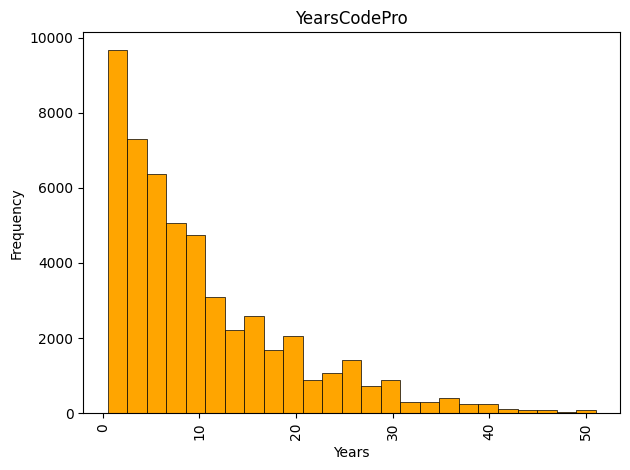

In [13]:
def clean_years(x):
    if x == 'Less than 1 year':
        return 0.5
    elif x == 'More than 50 years':
        return 51
    else:
        try:
            return float(x)
        except:
            return np.nan

df['YearsCodeProClean'] = df['YearsCodePro'].apply(clean_years)
df_sorted = df['YearsCodeProClean'].sort_values()
plt.hist(df_sorted, bins=25, color='orange',edgecolor='black',  # adds a border around each bar
         linewidth=0.5,)
plt.title('YearsCodePro')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [14]:
query='Select * From main WHERE CompTotal IS Not NULL'
df=pd.read_sql_query(query, conn)
df['CompTotal'].describe()

df['Age'].unique()

array(['18-24 years old', '25-34 years old', '35-44 years old',
       '45-54 years old', '55-64 years old', '65 years or older',
       'Under 18 years old', 'Prefer not to say'], dtype=object)

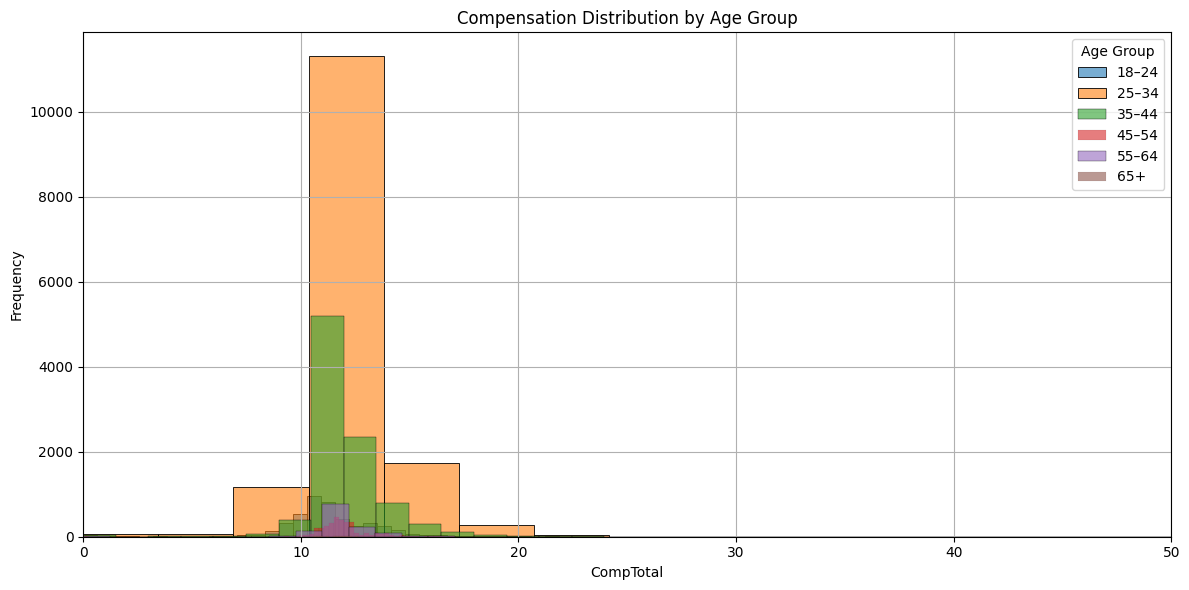

In [18]:
age_map={'18-24 years old':22, '25-34 years old':30, '35-44 years old':40,
       '45-54 years old':50, '55-64 years old':60, '65 years or older':70,
       'Under 18 years old':17, 'Prefer not to say':0
}
df['AgeNum']=df['Age'].map(age_map)

bins = [18, 25, 35, 45, 55, 65, 80]
labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65+']
df['AgeGroup'] = pd.cut(df['AgeNum'], bins=bins, labels=labels)
df['LogCompTotal'] = np.log1p(df['CompTotal'])  # log(1 + x) avoids log(0)

#plotting
import seaborn as sns

plt.figure(figsize=(12, 6))
for group in df['AgeGroup'].unique():
    subset = df[df['AgeGroup'] == group]
    sns.histplot(subset['LogCompTotal'], 
                 bins=100,label=group, alpha=0.6)

plt.legend(title='Age Group')
plt.title('Compensation Distribution by Age Group')
plt.xlabel('CompTotal')
plt.ylabel('Frequency')
plt.xlim(0,50)
plt.grid(True)
plt.tight_layout()
plt.show()

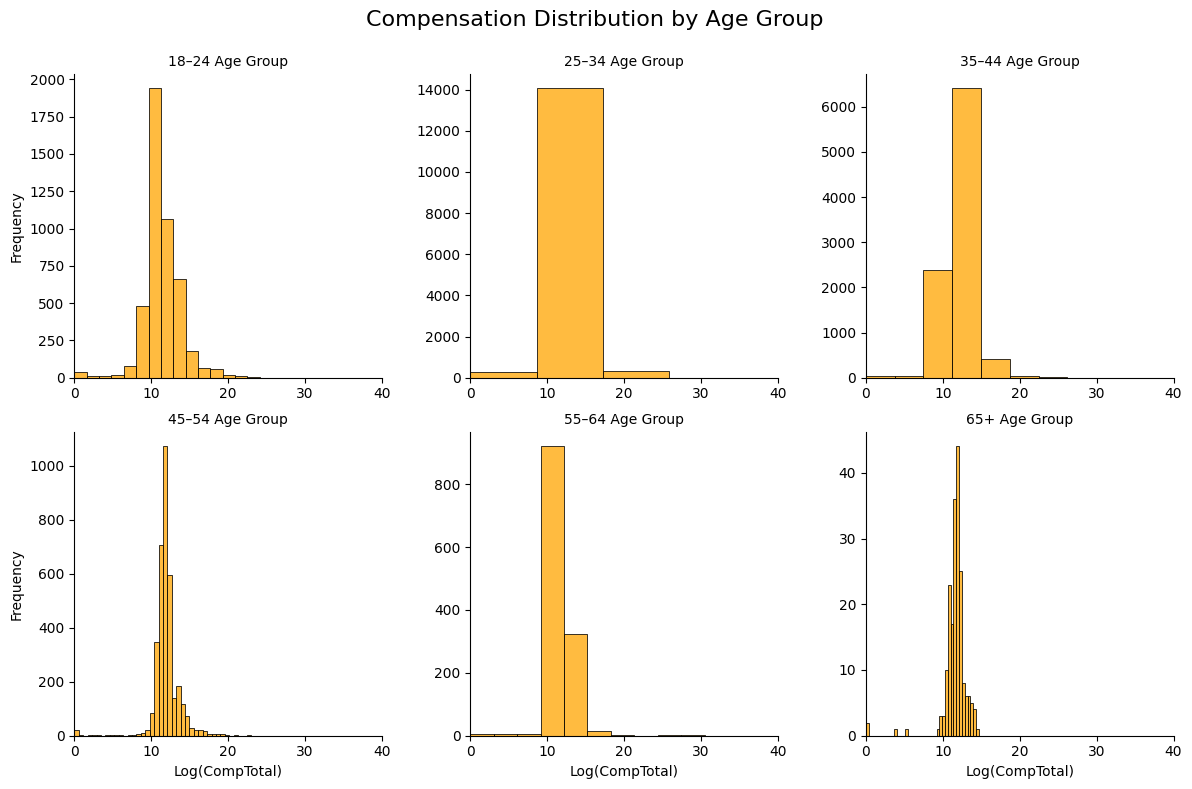

In [24]:

# Filter out missing or unmapped ages
df_clean = df[df['AgeGroup'].notna() & df['CompTotal'].notna()].copy()

# Optional: log-transform to reduce skew
df_clean['LogCompTotal'] = np.log1p(df_clean['CompTotal'])

# Create a FacetGrid
g = sns.FacetGrid(df_clean, col='AgeGroup', col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.histplot, 'LogCompTotal', bins=40, color='orange', edgecolor='black')

g.set_titles(col_template="{col_name} Age Group")
g.set_axis_labels("Log(CompTotal)", "Frequency")
g.set(xlim=(0, 40))
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Compensation Distribution by Age Group", fontsize=16)
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [48]:
query='Select * From main WHERE TimeSearching IS Not NULL'
df=pd.read_sql_query(query, conn)
df['TimeSearching'].describe()
df['TimeSearching'].unique()

array(['30-60 minutes a day', '60-120 minutes a day',
       '15-30 minutes a day', 'Less than 15 minutes a day',
       'Over 120 minutes a day'], dtype=object)

In [49]:
label_map = {
    'Less than 15 minutes a day': '<15 min',
    '15-30 minutes a day': '15–30 min',
    '30-60 minutes a day': '30–60 min',
    '60-120 minutes a day': '60–120 min',
    'Over 120 minutes a day': '>120 min'
}
df['TimeSearching'] = df['TimeSearching'].map(label_map)
df['TimeSearching'].isna().sum()

np.int64(0)

In [50]:
df_clean = df[df['TimeSearching'].notna() & df['Age'].notna()].reset_index()

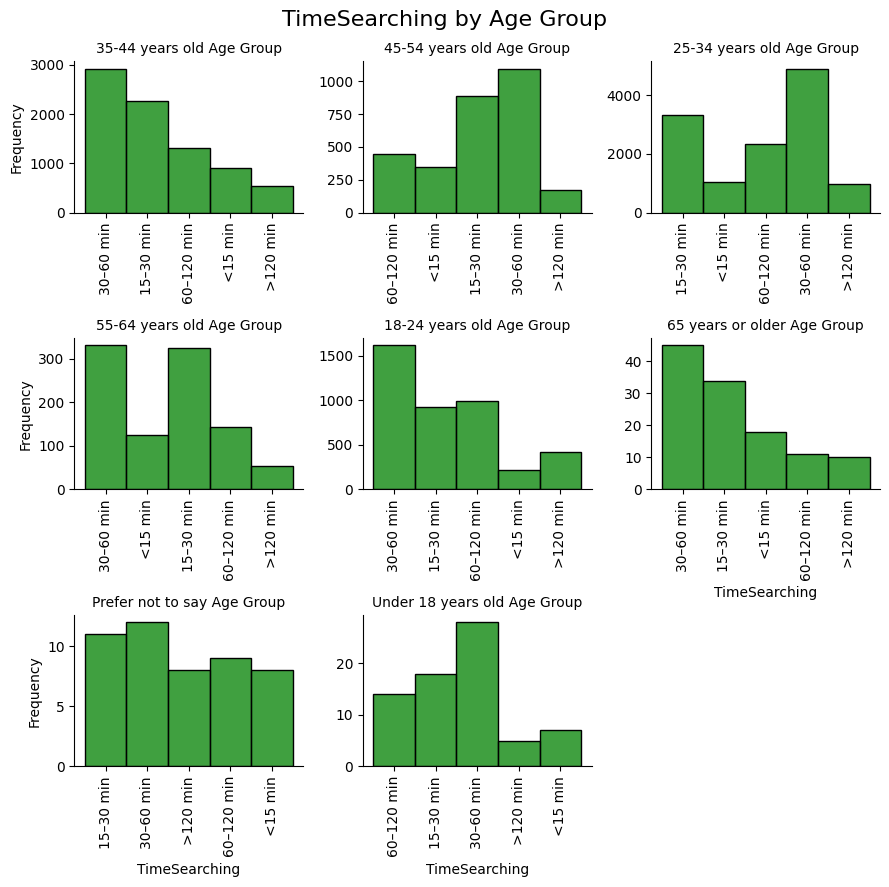

In [52]:
g = sns.FacetGrid(df_clean, col='Age', col_wrap=3, sharex=False, sharey=False, height=3)
g.map(sns.histplot, 'TimeSearching', bins=40, color='green', edgecolor='black')

g.set_titles(col_template="{col_name} Age Group")
g.set_axis_labels("TimeSearching", "Frequency")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("TimeSearching by Age Group", fontsize=16)
g.set_xticklabels(rotation=90)
plt.tight_layout()
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


In [59]:
query='Select * From main Where DatabaseWantToWorkWith IS NOT NULL'
df=pd.read_sql_query(query,conn)

df['DatabaseWantToWorkWith'].unique()

array(['PostgreSQL', 'Firebase Realtime Database',
       'MongoDB;MySQL;PostgreSQL', ...,
       'Cassandra;Firebase Realtime Database;MariaDB;Microsoft Access;MongoDB;MySQL;PostgreSQL;Redis',
       'MySQL;Presto;TiDB',
       'BigQuery;Cassandra;Databricks SQL;DuckDB;Elasticsearch;Firebase Realtime Database;Microsoft SQL Server;MongoDB;MySQL;PostgreSQL;Redis;Snowflake;SQLite;Supabase'],
      shape=(8478,), dtype=object)

In [60]:
#CLean
# Drop missing values
db_series = df['DatabaseWantToWorkWith'].dropna()

# Split by semicolon and flatten into a single list
all_dbs = db_series.str.split(';').explode().str.strip()

In [71]:
#count-value
top_dbs = all_dbs.value_counts().nlargest(5)
type(top_dbs)

pandas.core.series.Series

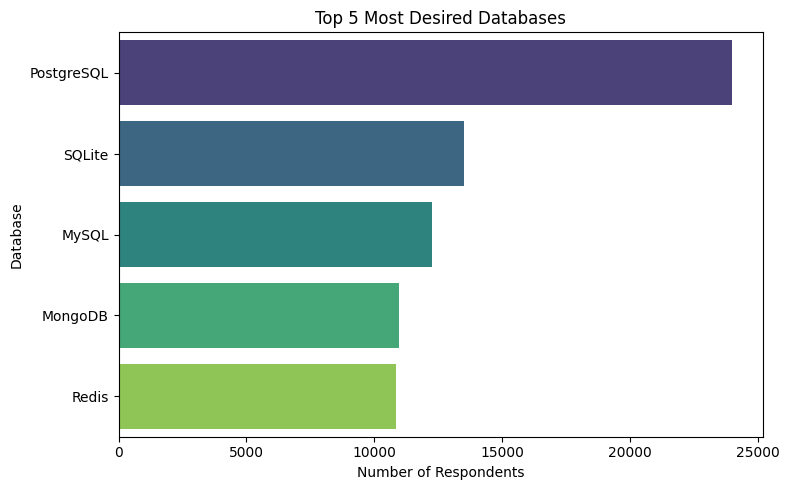

In [64]:
#plot 
plt.figure(figsize=(8, 5))
sns.barplot(x=top_dbs.values, y=top_dbs.index, hue=top_dbs.index, palette='viridis')

plt.title('Top 5 Most Desired Databases')
plt.xlabel('Number of Respondents')
plt.ylabel('Database')
plt.tight_layout()
plt.show()

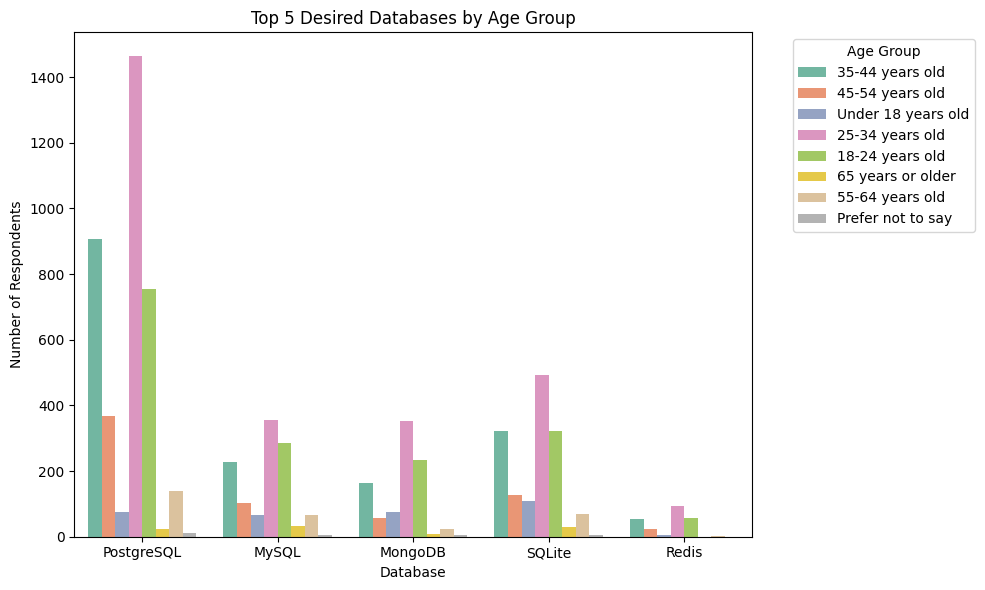

In [77]:
df=df.dropna(subset=['DatabaseWantToWorkWith'])
top_dbs = all_dbs.value_counts().nlargest(5).index
df_new=df[df['DatabaseWantToWorkWith'].isin(top_dbs)]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_new, x='DatabaseWantToWorkWith', hue='Age', palette='Set2')

plt.title('Top 5 Desired Databases by Age Group')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

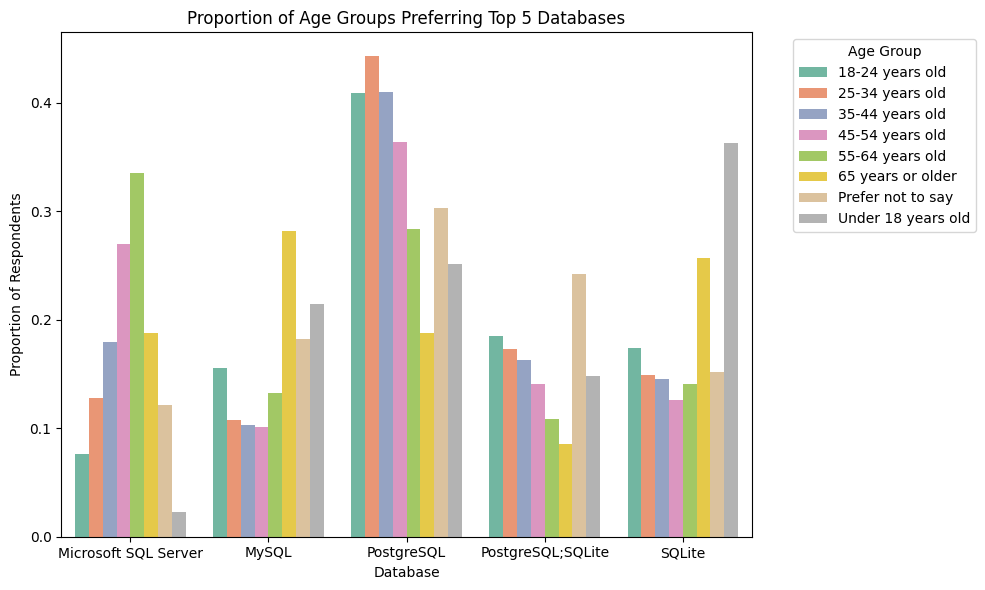

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Clean and explode database choices
df_clean = df.dropna(subset=['DatabaseWantToWorkWith'])
df_exploded = df_clean.assign(DatabaseWantToWorkWith=df_clean['DatabaseWantToWorkWith'].str.split(',')).explode('DatabaseWantToWorkWith')
df_exploded['DatabaseWantToWorkWith'] = df_exploded['DatabaseWantToWorkWith'].str.strip()

# Get top 5 databases
top_dbs = df_exploded['DatabaseWantToWorkWith'].value_counts().nlargest(5).index
df_top = df_exploded[df_exploded['DatabaseWantToWorkWith'].isin(top_dbs)]

# Group by Age and Database, then normalize
grouped = df_top.groupby(['Age', 'DatabaseWantToWorkWith']).size().reset_index(name='Count')
age_totals = df_top.groupby('Age').size().reset_index(name='Total')
merged = pd.merge(grouped, age_totals, on='Age')
merged['Proportion'] = merged['Count'] / merged['Total']

# Plot proportions
plt.figure(figsize=(10, 6))
sns.barplot(data=merged, x='DatabaseWantToWorkWith', y='Proportion', hue='Age', palette='Set2')

plt.title('Proportion of Age Groups Preferring Top 5 Databases')
plt.xlabel('Database')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


/tmp/ipykernel_300/454534875.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_remote, x='RemoteWork', palette='pastel')


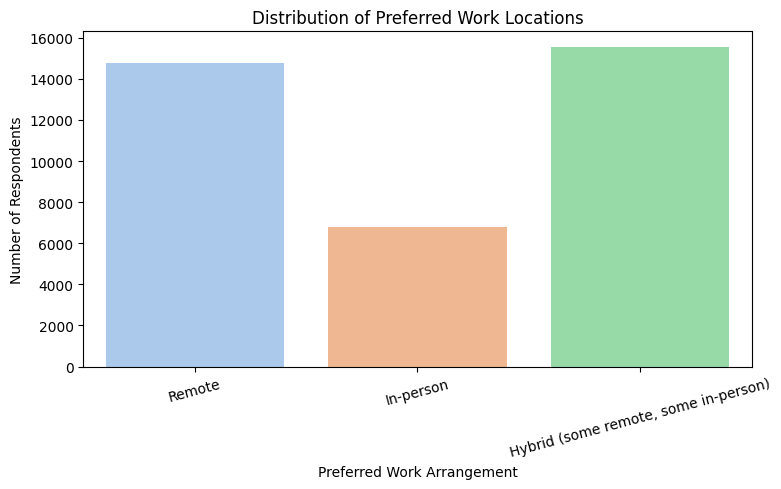

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing values in RemoteWork column
df_remote = df.dropna(subset=['RemoteWork'])

# Plot histogram (as a countplot since RemoteWork is categorical)
plt.figure(figsize=(8, 5))
sns.countplot(data=df_remote, x='RemoteWork', palette='pastel')

# Add labels and title
plt.title('Distribution of Preferred Work Locations')
plt.xlabel('Preferred Work Arrangement')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


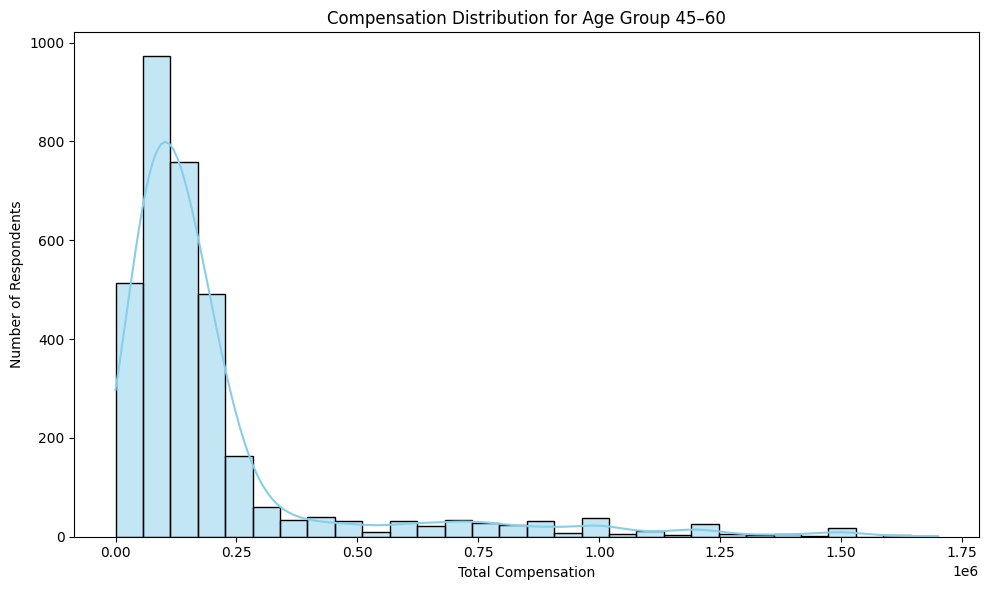

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for age group 45 to 60 and drop missing compensation values
df_mid_career = df[(df['Age'].astype(str).str.contains('45-54|55-64')) & df['CompTotal'].notna()]

# Optional: Remove extreme outliers for better visualization
df_mid_career = df_mid_career[df_mid_career['CompTotal'] < df_mid_career['CompTotal'].quantile(0.95)]

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df_mid_career, x='CompTotal', bins=30, kde=True, color='skyblue')

# Add labels and title
plt.title('Compensation Distribution for Age Group 45–60')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


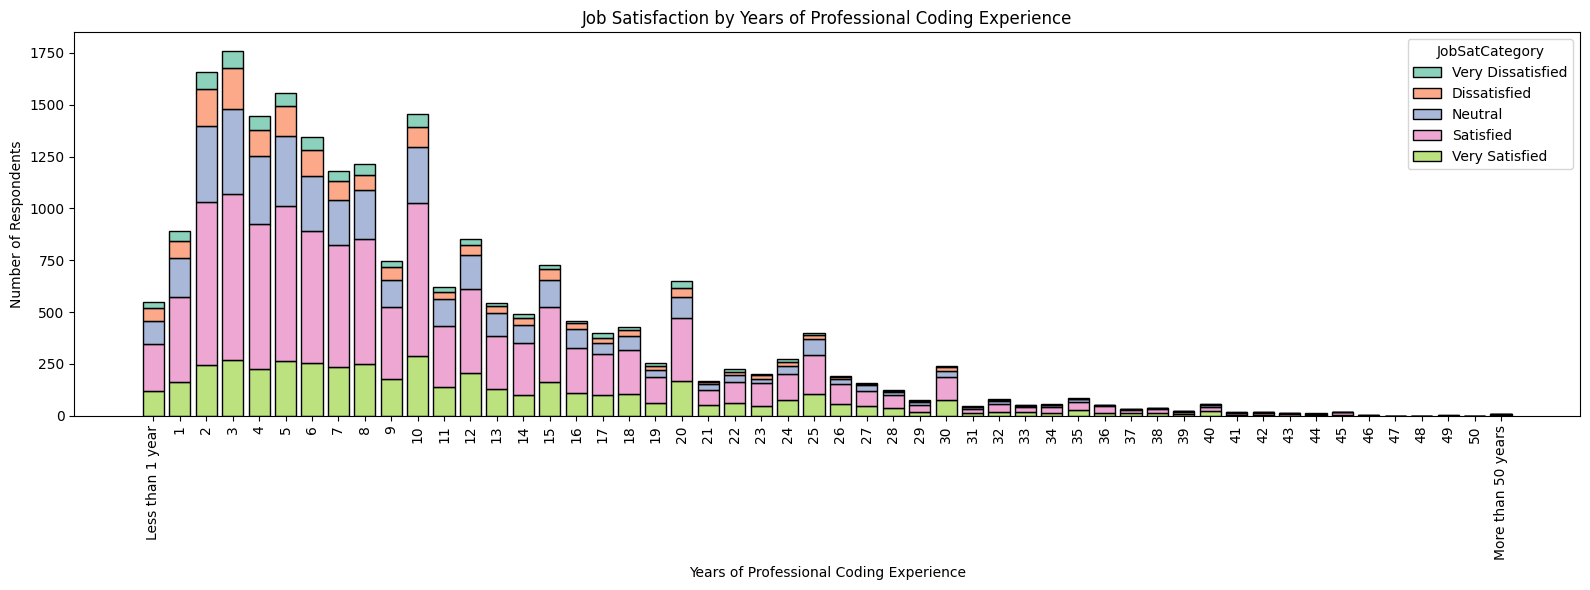

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns


experience_order = [
    'Less than 1 year'
] + [str(i) for i in range(1, 51)] + ['More than 50 years']
# Drop missing values
df_clean = df.dropna(subset=['YearsCodePro', 'JobSat']).copy()

# Define bins and corresponding labels
bins = [-1, 2, 4, 6, 8, 10]  # Adjust thresholds as needed
labels = ['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
# Ensure JobSat is numeric
df_clean['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Create a new categorical column
df_clean['JobSatCategory'] = pd.cut(df_clean['JobSat'], bins=bins, labels=labels)

# Convert to ordered categorical type
df_clean['YearsCodePro'] = pd.Categorical(df_clean['YearsCodePro'], categories=experience_order, ordered=True)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))
sns.histplot(data=df_clean, x='YearsCodePro', hue='JobSatCategory', multiple='stack', shrink=0.8, palette='Set2',legend=True)

plt.title('Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
